# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression challenge
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
def BuildTrain(x,y):

  reg = nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
      )

  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(reg.parameters(),lr=.05)


  epochs = 500
  losses = torch.zeros(epochs)

  for epoch in range(epochs):

    yHat = reg(x)

    loss = lossfun(yHat,y)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
  predictions = reg(x)
  return predictions, losses

In [3]:
def data(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

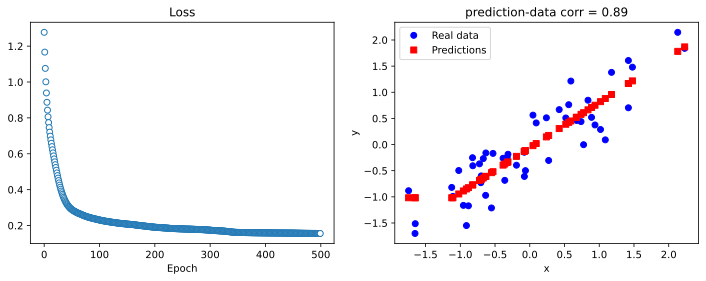

In [4]:
x,y = data(.8)

yHat,losses = BuildTrain(x,y)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [5]:
slopes = np.linspace(-2,2,21)

numExps = 21

results = np.zeros((len(slopes),numExps,2))

for slope in range(len(slopes)):

  for N in range(numExps):

    x,y = data(slopes[slope])
    yHat,losses = BuildTrain(x,y)
    yHat = yHat.detach()

    results[slope,N,0] = losses[-1]
    results[slope,N,1] = np.corrcoef(y.T,yHat.T)[0,1]


results[np.isnan(results)] = 0

C:\Users\litwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\litwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


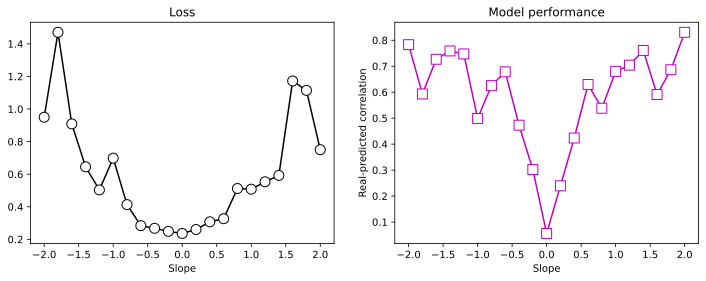

In [6]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()